**Homework 4 Spring 202**

**Due Date** - **11/23/2022**

Your Name - Aaron Zhao

Your UNI - sz2940


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# PART 2 CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [2]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [3]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

In [4]:
print(list(y_dev[:100]).count(0))

6


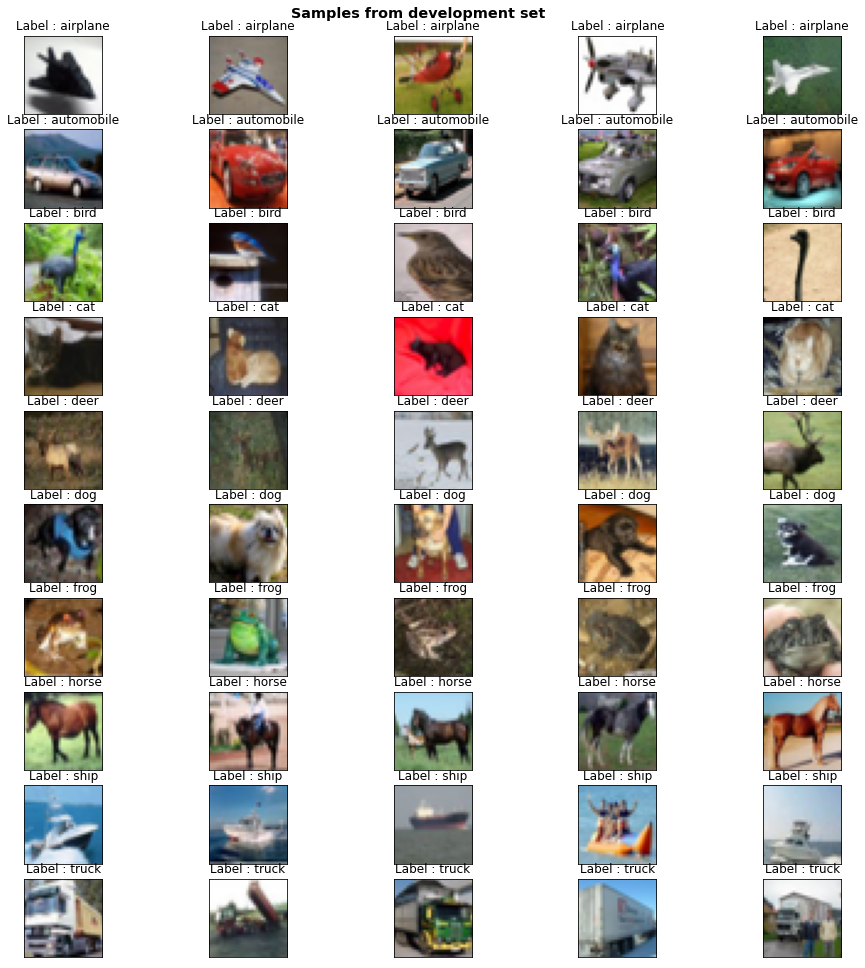

In [5]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize = (16,16))
# ax = ax.flatten()

num = 0
i = 0
while True:
  r = y_dev[num][0]
  for c in range(5):
    if not ax[r,c].has_data():
      ax[r,c].imshow(x_dev[num])
      ax[r,c].set_title('Label : {}'.format(LABELS[r]))
      ax[r,c].get_xaxis().set_visible(False)
      ax[r,c].get_yaxis().set_visible(False)
      i += 1
      break
  st = fig.suptitle('Samples from development set',fontsize = 'x-large', fontweight ="bold")
  st.set_y(0.95)
  fig.subplots_adjust(top=0.925)
  num += 1
  if i==50:
    break




2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [6]:
# 1)

shapes = [x_dev, y_dev, x_test, y_test]
shapes_name = ['x_dev', 'y_dev', 'x_test', 'y_test']
for i in range(len(shapes)):
  print('The shape of {} is: '.format(shapes_name[i]), shapes[i].shape)

# 2)

# shapes_flatten = [x_dev, x_test]
# shapes_flatten_name = ['x_dev', 'x_test']
# x_dev_flatten = []
# x_test_flatten = []
# x_flatten = [x_dev_flatten, x_test_flatten]

# for i in range(len(shapes_flatten)):
#   for j in range(len(shapes_flatten[i])):
#     x_flatten[i].append(shapes_flatten[i][j].flatten())

# for i in range(len(x_flatten)):
#   print('The flatten shape of {} is: '.format(shapes_flatten_name[i]), np.array(x_flatten[i]).shape)

x_dev_flatten = np.reshape(x_dev, (x_dev.shape[0], 32*32*3))
x_test_flatten = np.reshape(x_test, (x_test.shape[0], 32*32*3))

print('The flatten shape of x_dev_flatten is: ', x_dev_flatten.shape)
print('The flatten shape of x_test_flatten is: ', x_test_flatten.shape)
# 3)

x_dev_flatten = x_dev_flatten/255
x_test_flatten = x_test_flatten/255

# 4)

X_train, X_val, y_train, y_val = train_test_split(x_dev_flatten, y_dev, train_size = 0.8, random_state=42)

The shape of x_dev is:  (50000, 32, 32, 3)
The shape of y_dev is:  (50000, 1)
The shape of x_test is:  (10000, 32, 32, 3)
The shape of y_test is:  (10000, 1)
The flatten shape of x_dev_flatten is:  (50000, 3072)
The flatten shape of x_test_flatten is:  (10000, 3072)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [7]:
# build model
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras import Sequential

model = Sequential([Dense(128, input_shape = (3072,), activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


2.5) Do you think this number is dependent on the image height and width? 

The number of trainable params is 402,250. Yes, it's dependent on the image height and width.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [9]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(X_train[0].reshape(1,-1))

# print(output)
print("Output: {:.2f}".format(sum(output[0])))

Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs with batch size 128.

In [10]:
print(X_train[0])
print(y_train[0])

[0.13333333 0.14117647 0.16862745 ... 0.22745098 0.21960784 0.22745098]
[6]


In [11]:

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20,  verbose = 1,batch_size= 128, validation_data =(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 1.9217 - accuracy: 0.3109 - val_loss: 1.8171 - val_accuracy: 0.3474
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.7577 - accuracy: 0.3715 - val_loss: 1.7443 - val_accuracy: 0.3652
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6818 - accuracy: 0.3995 - val_loss: 1.6495 - val_accuracy: 0.4066
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6286 - accuracy: 0.4220 - val_loss: 1.6557 - val_accuracy: 0.4034
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6094 - accuracy: 0.4230 - val_loss: 1.6134 - val_accuracy: 0.4233
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.5656 - accuracy: 0.4457 - val_loss: 1.5741 - val_accuracy: 0.4341
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.5391 - accuracy: 0.4536 - val_loss: 1.5628 - val_accuracy: 0.4414
Epoch 

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

Text(0, 0.5, 'Accuracy')

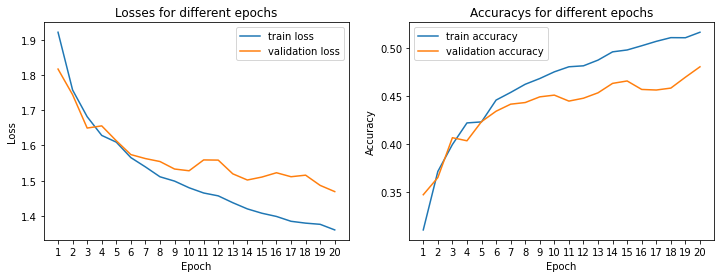

In [12]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

index = [int(i) for i in range(1,21,1)]
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].xaxis.set_major_locator(mticker.MultipleLocator(1))
sns.lineplot(x = index, y = train_loss , label = 'train loss' , ax = ax[0])
sns.lineplot(x = index, y = val_loss , label = 'validation loss' , ax = ax[0])
ax[0].set_title('Losses for different epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

sns.lineplot(x = index, y = train_acc , label = 'train accuracy' , ax = ax[1])
sns.lineplot(x = index, y = val_acc , label = 'validation accuracy' , ax = ax[1])
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(1))
ax[1].set_title('Accuracys for different epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

2.8) Finally, report the metric chosen on test set.

In [13]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4466 - accuracy: 0.4885


[1.4465781450271606, 0.4884999990463257]

2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy [Open ended question, you may try different approaches]

In [14]:
# try increasing the number of epochs

history_method1 = model.fit(X_train, y_train, epochs = 30, verbose = 0, batch_size= 128, validation_data =(X_val, y_val))
print('model1: ',model.evaluate(x_test_flatten, y_test))


# add more layers of feed forward network, larger size,  more epochs, and larger batch size

model_method2 = Sequential([Dense(512, input_shape = (3072,), activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

model_method2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history_method2 = model_method2.fit(X_train, y_train, epochs = 20,  verbose = 0, batch_size= 200, validation_data =(X_val, y_val))
print('model2: ',model_method2.evaluate(x_test_flatten, y_test))


313/313 [==============================] - 1s 2ms/step - loss: 1.4490 - accuracy: 0.4965
model1:  [1.4490002393722534, 0.4964999854564667]
313/313 [==============================] - 1s 2ms/step - loss: 1.3884 - accuracy: 0.5140
model2:  [1.3884302377700806, 0.5139999985694885]


2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

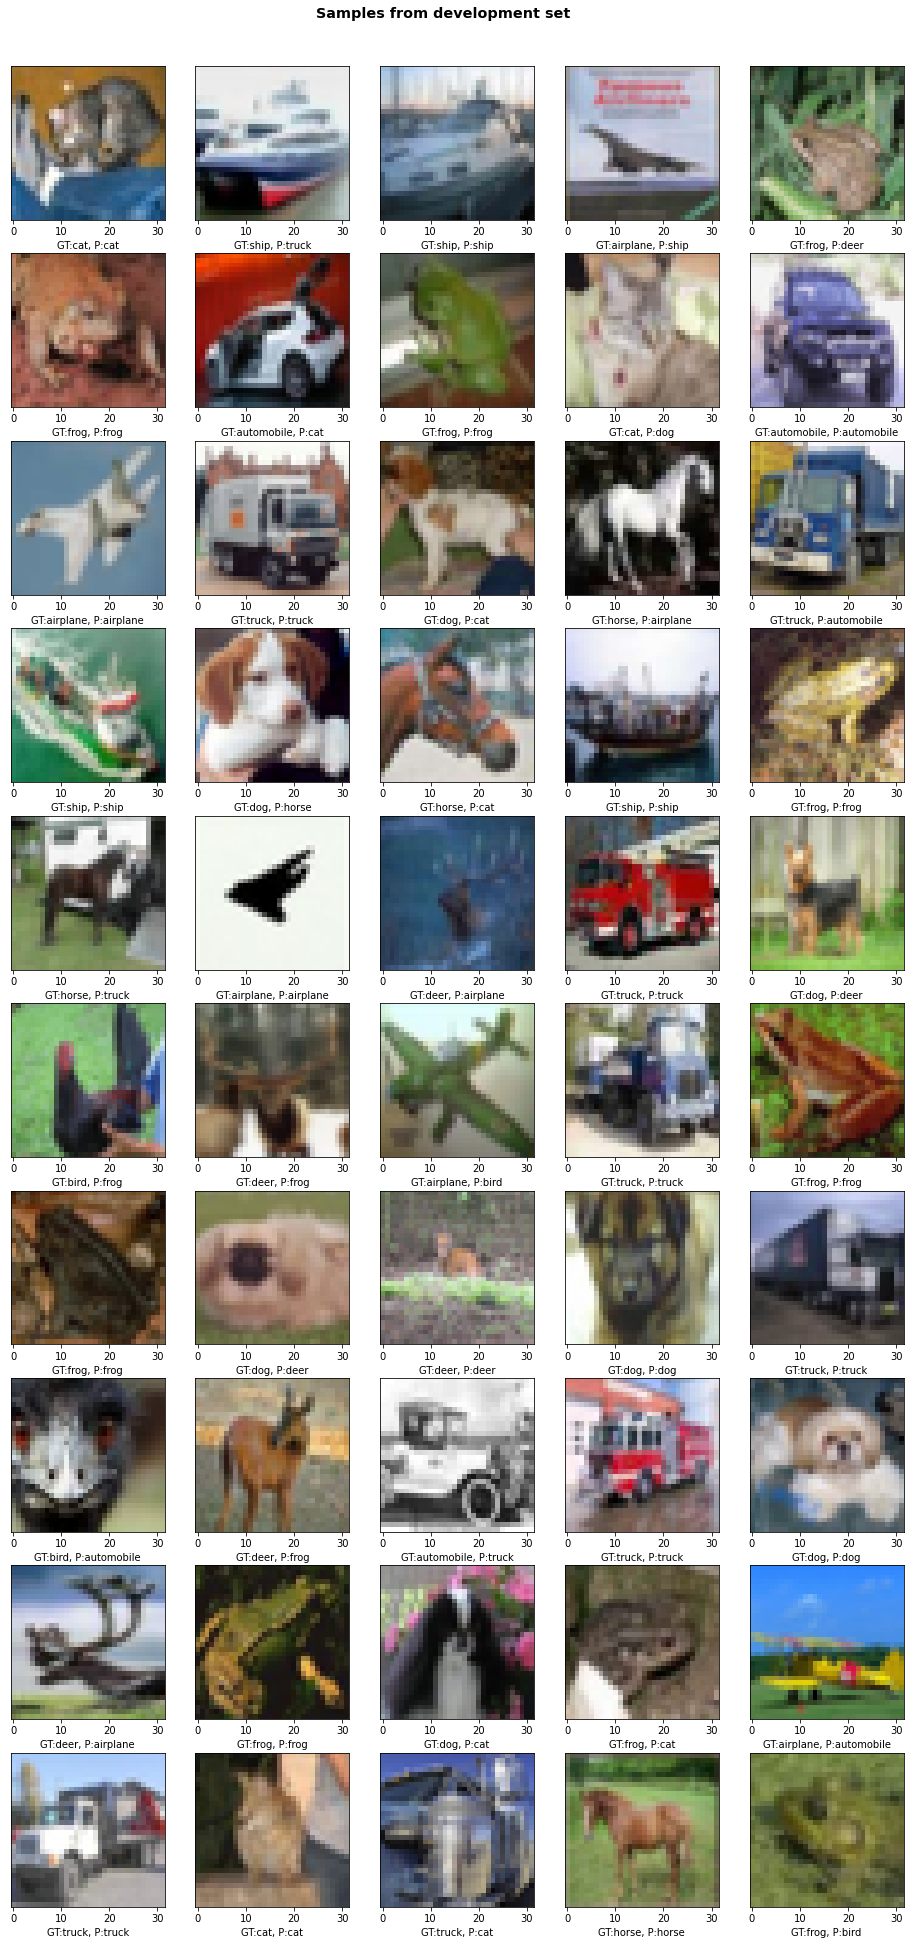

In [15]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize = (16,32))
ax = ax.flatten()

predictions = np.argmax(model_method2.predict(x_test_flatten), axis = 1)
true_labels = np.argmax(y_test, axis =1)
for i in range(50):
    ax[i].imshow(x_test[i])
    ax[i].set_xlabel('GT:{}, P:{}'.format(LABELS[int(y_test[i])],LABELS[int(predictions[i])]))
    ax[i].get_yaxis().set_visible(False)
    st = fig.suptitle('Samples from development set',fontsize = 'x-large', fontweight ="bold")
    st.set_y(0.95)
    fig.subplots_adjust(top=0.925)

# PART 3 Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [16]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4 )Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation.

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)


In [17]:
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
cnn = Sequential()
cnn.add(Conv2D(6, kernel_size = (5,5), strides=(1, 1),padding = 'same', activation = 'relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(120, kernel_size = (5,5), activation = 'relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))

3.2 Report the model summary 

In [18]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

313/313 [==============================] - 1s 3ms/step - loss: 1.0534 - accuracy: 0.6485


[1.0534288883209229, 0.6485000252723694]

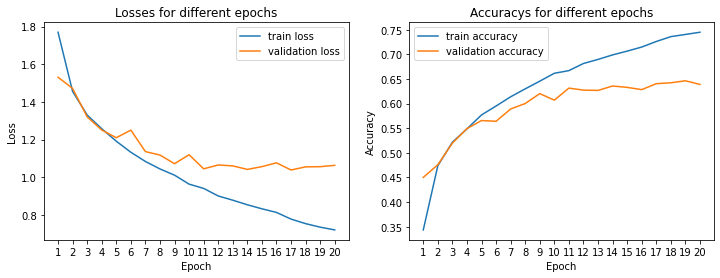

In [19]:
cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = cnn.fit(X_train, y_train, epochs = 20,  batch_size= 128, verbose = 0, validation_data =(X_val, y_val))

index = [int(i) for i in range(1,21,1)]
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].xaxis.set_major_locator(mticker.MultipleLocator(1))
sns.lineplot(x = index, y = train_loss , label = 'train loss' , ax = ax[0])
sns.lineplot(x = index, y = val_loss , label = 'validation loss' , ax = ax[0])
ax[0].set_title('Losses for different epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

sns.lineplot(x = index, y = train_acc , label = 'train accuracy' , ax = ax[1])
sns.lineplot(x = index, y = val_acc , label = 'validation accuracy' , ax = ax[1])
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(1))
ax[1].set_title('Accuracys for different epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

cnn.evaluate(x_test, y_test)


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

Text(0, 0.5, 'Accuracy')

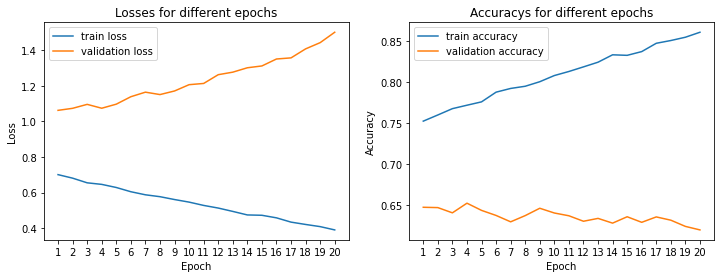

In [20]:
# 1)

from tensorflow.python.keras.layers import Dropout

cnn_drop = Sequential()
cnn_drop.add(Conv2D(6, kernel_size = (5,5), strides=(1, 1),\
              padding = 'same', activation = 'relu', input_shape = (32,32,3)))
cnn_drop.add(MaxPooling2D(2,2))
cnn_drop.add(Dropout(0.3))

cnn_drop.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
cnn_drop.add(MaxPooling2D(2,2))
cnn_drop.add(Dropout(0.3))

cnn_drop.add(Conv2D(120, kernel_size = (5,5), activation = 'relu'))
cnn_drop.add(Flatten())

cnn_drop.add(Dropout(0.3))
cnn_drop.add(Dense(84, activation = 'relu'))
cnn_drop.add(Dropout(0.3))
cnn_drop.add(Dense(10, activation = 'softmax'))

cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = cnn.fit(X_train, y_train, epochs = 20,  batch_size= 128, verbose = 0, validation_data =(X_val, y_val))

index = [int(i) for i in range(1,21,1)]
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].xaxis.set_major_locator(mticker.MultipleLocator(1))
sns.lineplot(x = index, y = train_loss , label = 'train loss' , ax = ax[0])
sns.lineplot(x = index, y = val_loss , label = 'validation loss' , ax = ax[0])
ax[0].set_title('Losses for different epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

sns.lineplot(x = index, y = train_acc , label = 'train accuracy' , ax = ax[1])
sns.lineplot(x = index, y = val_acc , label = 'validation accuracy' , ax = ax[1])
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(1))
ax[1].set_title('Accuracys for different epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')




Text(0, 0.5, 'Accuracy')

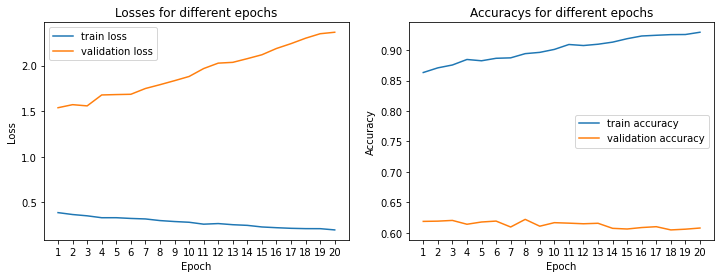

In [21]:
# 2)
from tensorflow.keras.layers import BatchNormalization

cnn_drop = Sequential()
cnn_drop.add(Conv2D(6, kernel_size = (5,5), strides=(1, 1),\
              padding = 'same', activation = 'relu', input_shape = (32,32,3)))
cnn_drop.add(MaxPooling2D(2,2))
cnn_drop.add(BatchNormalization())

cnn_drop.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
cnn_drop.add(MaxPooling2D(2,2))
cnn_drop.add(BatchNormalization())

cnn_drop.add(Conv2D(120, kernel_size = (5,5), activation = 'relu'))
cnn_drop.add(BatchNormalization())

cnn_drop.add(Flatten())
cnn_drop.add(Dense(84, activation = 'relu'))
cnn_drop.add(BatchNormalization())
cnn_drop.add(Dense(10, activation = 'softmax'))


cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = cnn.fit(X_train, y_train, epochs = 20,  batch_size= 128, verbose = 0, validation_data =(X_val, y_val))

index = [int(i) for i in range(1,21,1)]
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].xaxis.set_major_locator(mticker.MultipleLocator(1))
sns.lineplot(x = index, y = train_loss , label = 'train loss' , ax = ax[0])
sns.lineplot(x = index, y = val_loss , label = 'validation loss' , ax = ax[0])
ax[0].set_title('Losses for different epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

sns.lineplot(x = index, y = train_acc , label = 'train accuracy' , ax = ax[1])
sns.lineplot(x = index, y = val_acc , label = 'validation accuracy' , ax = ax[1])
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(1))
ax[1].set_title('Accuracys for different epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

In [ ]:
# 3)

'''
In my plots, the dropout helps better with overfitting, however, i can still observe overfitting on my 2 plots.
the losses of the second plot is larger than the first one and the accurary of validation accuracy is also lower

'''